In [50]:
import os
import re
import pandas as pd
from typing import Pattern

# V1, split lines, split tokens, clean tokens, validate tokens
def parse_text_0(data: str, valid_chars_regex: Pattern)-> dict:
    lines = data.split("\n")
    cleaned_tokens=[]
    for line in lines:
        tokens = line.split()
        for token in tokens:
            stripped_token = re.sub(r"[,.:\-!']","", token)
            if re.match(valid_chars_regex, stripped_token):
                cleaned_tokens.append(stripped_token)
    return dict.fromkeys(cleaned_tokens)

# Do we want to include numbers? Possibly should be alphanumeric.
# Validate tokens (is this the best version?)
valid_chars1 = r"^[A-Za-z]+$" 
dirpath = "./bow-sets/bow-train/spam"

# Extract text contents from file
def extract_data(filepath):
    with open(filepath, "r", errors="ignore") as file:
        return file.read()

# Less nesting, preferred method
# V2, split lines, clean lines, split lines, validate tokens
def parse_text(data: str, valid_chars_regex: Pattern) -> dict:
    cleaned_tokens=[]
    line = re.sub(r"\n", " ", data)
    line = re.sub(r"[.,:\-!']","", line)
    tokens = line.split(" ")
    for token in tokens:
        if re.match(valid_chars_regex, token):
            cleaned_tokens.append(token.strip())
    return dict.fromkeys(cleaned_tokens, 1)

bag_of_words = {}
files = os.listdir(dirpath)
"""
for filename in files:
    filepath = os.path.join(dirpath, filename)
    data = extract_data(filepath)
    tokens = parse_text(data, valid_chars1)
    print(tokens)
    break
"""
for filename in files:
    filepath = os.path.join(dirpath, filename)
    data = extract_data(filepath)
    token_dict = parse_text(data, valid_chars1)
    # Should we use 'keys()' or 'items()'?
    for word in token_dict.keys():
        bag_of_words[word] = bag_of_words.get(word, 0) + 1

bag_of_words = dict(sorted(bag_of_words.items(), key=lambda item:item[1], reverse=True))
for elem in bag_of_words.items():
    if elem[1] > 200:
        print(elem)
    
    
    

        

('From', 500)
('Received', 500)
('from', 500)
('with', 500)
('id', 500)
('To', 500)
('Subject', 500)
('Date', 500)
('ReturnPath', 494)
('ESMTP', 492)
('localhost', 475)
('DeliveredTo', 474)
('by', 462)
('ContentType', 462)
('for', 457)
('MessageId', 423)
('to', 419)
('the', 398)
('MIMEVersion', 376)
('and', 369)
('you', 365)
('of', 364)
('a', 361)
('dogmaslashnullorg', 356)
('IMAP', 351)
('in', 342)
('ContentTransferEncoding', 340)
('SMTP', 340)
('Sep', 321)
('your', 319)
('be', 319)
('is', 301)
('this', 297)
('or', 280)
('are', 273)
('our', 265)
('jalapeno', 263)
('XMailer', 259)
('zzzzasonorg', 252)
('on', 237)
('email', 234)
('webnotenet', 231)
('ReplyTo', 229)
('not', 228)
('have', 223)
('that', 216)
('This', 215)
('phoboslabsspamassassintaintorg', 202)


epoch: 0 loss:  92.32078294903626
epoch: 400 loss:  33.79131790081576
epoch: 800 loss:  27.9918542960729
epoch: 1200 loss:  24.33481690722147
epoch: 1600 loss:  22.028754937538633


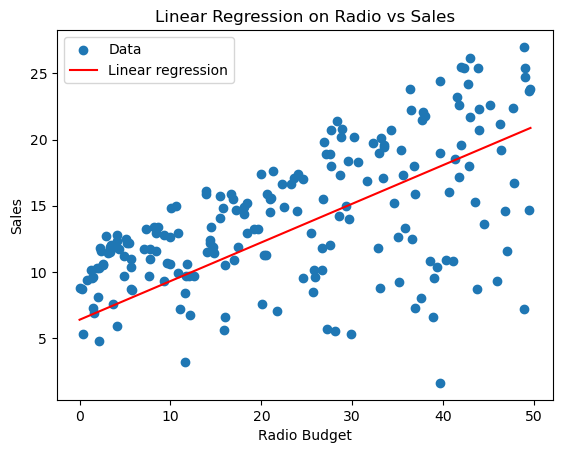



epoch: 0 loss:  92.32078294903626
epoch: 400 loss:  33.79131790081576
epoch: 800 loss:  27.9918542960729
epoch: 1200 loss:  24.33481690722147
epoch: 1600 loss:  22.028754937538633
epoch: 2000 loss:  20.57459375662496
epoch: 2400 loss:  19.657625883308423
epoch: 2800 loss:  19.07940244306619
epoch: 3200 loss:  18.71478514667572
epoch: 3600 loss:  18.48486404079425
epoch: 4000 loss:  18.33987992881413
epoch: 4400 loss:  18.248455556762373
epoch: 4800 loss:  18.19080499291156
epoch: 5200 loss:  18.154451584758743
epoch: 5600 loss:  18.131527779750563
epoch: 6000 loss:  18.117072440822145
epoch: 6400 loss:  18.1079571642151
epoch: 6800 loss:  18.102209234814435
epoch: 7200 loss:  18.098584693967343
epoch: 7600 loss:  18.096299123732113
epoch: 8000 loss:  18.094857884270205
epoch: 8400 loss:  18.093949064600373
epoch: 8800 loss:  18.09337597927063
epoch: 9200 loss:  18.093014601974247
epoch: 9600 loss:  18.092786723954067
epoch: 10000 loss:  18.09264302817517
epoch: 10400 loss:  18.092552

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# reading csv
df = pd.read_csv('Advertising.csv')

# ???
def update_w_and_b(spendings, sales, w, b, alpha):
    dl_dw = 0.0
    dl_db = 0.0
    N = len(spendings)

    for i in range(N):
        dl_dw += -2*spendings[i]*(sales[i] - (w*spendings[i] + b))
        dl_db += -2*(sales[i] - (w*spendings[i] + b))

    w = w - (1/float(N))*dl_dw*alpha
    b = b - (1/float(N))*dl_db*alpha

    return w, b

# ???
def train(spendings, sales, w, b, alpha, epochs):
    for e in range(epochs):
        w, b = update_w_and_b(spendings, sales, w, b, alpha)

        if e % 400 == 0:
            print("epoch:", e, "loss: ", avg_loss(spendings, sales, w, b))

    return w, b

# ???
def avg_loss(spendings, sales, w, b):
    N = len(spendings)
    total_error = 0.0
    for i in range(N):
        total_error += (sales[i] - (w*spendings[i] + b))**2
    return total_error / float(N)
                                    
                        
# parameters
w_init = 0.0
b_init = 0.0
alpha = 0.001
epochs = 2000

# features
spendings = df['radio'].values
sales = df['sales'].values

# Train the model
w, b = train(spendings, sales, w_init, b_init, alpha, epochs)

# plot data and linear regression
plt.scatter(spendings, sales, label='Data')
x_line = np.linspace(min(spendings), max(spendings), 100)
y_line = w * x_line + b
plt.plot(x_line, y_line, color='red', label='Linear regression')
plt.xlabel('Radio Budget')
plt.ylabel('Sales')
plt.legend()
plt.title('Linear Regression on Radio vs Sales')
plt.show()

print("\n")
## Test Prediction
def predict(x,w,b):
    prediction = w*x + b
    print(f'Input of {x} has a predicted output of {prediction}')
    return prediction


w, b = train(spendings, sales, 0.0, 0.0, 0.001, 15000)
x = 23.0
y = predict(x,w,b)